In [203]:
import pandas as pd
import statsmodels.api as sm

In [204]:
df = pd.read_csv("mumbai.csv")

In [205]:
df.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,19.032800,72.896357,2.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35612.082671
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,19.032800,72.896357,3.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35934.291581
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,19.085600,72.909277,3.0,3.0,NaN,Under Construction,New Property,1.0,NaN,2.0,NaN,Flat,\n \n \n...,32747.933884
3,18700000.0,"Plot Number 283, Road Number 3, Jawahar Nagar,...",629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,1.0,NaN,3.0,Laxmi Callista,Flat,\n\n\n Welcome ...,29729.729730
4,13500000.0,"malad east, Malad East, Mumbai - North Mumbai,...",1090.0,19.177555,72.849887,2.0,2.0,NaN,NaN,New Property,1.0,Unfurnished,2.0,near uper govind nagar,Flat,\n \n \n...,12385.321101


In [206]:
df.shape

(6255, 17)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   Address           6255 non-null   object 
 2   area              6255 non-null   float64
 3   latitude          6255 non-null   float64
 4   longitude         6255 non-null   float64
 5   Bedrooms          6255 non-null   float64
 6   Bathrooms         6255 non-null   float64
 7   Balcony           2376 non-null   float64
 8   Status            5774 non-null   object 
 9   neworold          6255 non-null   object 
 10  parking           2129 non-null   float64
 11  Furnished_status  3600 non-null   object 
 12  Lift              1678 non-null   float64
 13  Landmarks         2617 non-null   object 
 14  type_of_building  6255 non-null   object 
 15  desc              6255 non-null   object 
 16  Price_sqft        6255 non-null   float64


In [208]:
df.dtypes

price               float64
Address              object
area                float64
latitude            float64
longitude           float64
Bedrooms            float64
Bathrooms           float64
Balcony             float64
Status               object
neworold             object
parking             float64
Furnished_status     object
Lift                float64
Landmarks            object
type_of_building     object
desc                 object
Price_sqft          float64
dtype: object

In [209]:
df["type_of_building"].unique()

array(['Flat', 'Individual House'], dtype=object)

In [210]:
df = df[~(df['type_of_building'] == 'Individual House')]

In [211]:
df.shape

(5828, 17)

In [212]:
df["Furnished_status"].unique()

array([nan, 'Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [213]:
df["Furnished_status"] = df["Furnished_status"].fillna("Unfurnished")

In [224]:
df["Balcony"] = df["Balcony"].fillna(0)

In [225]:
dummies1 = pd.get_dummies(df["Furnished_status"])
dummies2 = pd.get_dummies(df["neworold"])
dummies1

,Furnished,Semi-Furnished,Unfurnished
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
6250,0,1,0
6251,0,0,1
6252,0,0,1
6253,1,0,0


In [226]:
merged = pd.concat([df,dummies1],axis="columns")
merged = pd.concat([merged,dummies2],axis="columns")
merged

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,...,Lift,Landmarks,type_of_building,desc,Price_sqft,Furnished,Semi-Furnished,Unfurnished,New Property,Resale
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,...,2.0,NaN,Flat,\n\n\n Right fr...,35612.082671,0,0,1,1,0
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,...,2.0,NaN,Flat,\n\n\n Right fr...,35934.291581,0,0,1,1,0
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,...,2.0,NaN,Flat,\n \n \n...,32747.933884,0,0,1,1,0
3,18700000.0,"Plot Number 283, Road Number 3, Jawahar Nagar,...",629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,...,3.0,Laxmi Callista,Flat,\n\n\n Welcome ...,29729.729730,0,0,1,1,0
4,13500000.0,"malad east, Malad East, Mumbai - North Mumbai,...",1090.0,19.177555,72.849887,2.0,2.0,0.0,NaN,New Property,...,2.0,near uper govind nagar,Flat,\n \n \n...,12385.321101,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,19500000.0,"Yari Road, Mumbai - Western Suburbs, Maharashtra",810.0,19.138320,72.810020,2.0,2.0,0.0,Ready to Move,Resale,...,0.0,NaN,Flat,\n\n\n This Mu...,24074.074074,0,1,0,0,1
6251,22000000.0,"502., Hari Om Nagar, Mumbai - North Mumbai, Ma...",1400.0,19.221920,72.854250,3.0,3.0,1.0,Ready to Move,Resale,...,0.0,NaN,Flat,\n \n \n...,15714.285714,0,0,1,0,1
6252,20000000.0,"Lokhandwala Complex, Andheri West, Lokhandwala...",750.0,19.144320,72.824111,2.0,2.0,0.0,Ready to Move,Resale,...,1.0,"Lokhandwala Complex, Andheri West",Flat,\n\n\n This Fr...,26666.666667,0,0,1,0,1
6253,11000000.0,"Sion, Mumbai - Central Mumbai, Maharashtra",700.0,19.047201,72.872225,2.0,2.0,0.0,Ready to Move,Resale,...,0.0,NaN,Flat,\n,15714.285714,1,0,0,0,1


In [236]:
final = merged.drop(["Address","latitude","longitude","Status","parking","Landmarks","type_of_building","desc","Semi-Furnished","neworold","Furnished_status","Resale","Lift"],axis="columns")
final

,price,area,Bedrooms,Bathrooms,Balcony,Price_sqft,Furnished,Unfurnished,New Property
0,22400000.0,629.0,2.0,2.0,0.0,35612.082671,0,1,1
1,35000000.0,974.0,3.0,2.0,0.0,35934.291581,0,1,1
2,31700000.0,968.0,3.0,3.0,0.0,32747.933884,0,1,1
3,18700000.0,629.0,2.0,2.0,2.0,29729.729730,0,1,1
4,13500000.0,1090.0,2.0,2.0,0.0,12385.321101,0,1,1
...,...,...,...,...,...,...,...,...,...
6250,19500000.0,810.0,2.0,2.0,0.0,24074.074074,0,0,0
6251,22000000.0,1400.0,3.0,3.0,1.0,15714.285714,0,1,0
6252,20000000.0,750.0,2.0,2.0,0.0,26666.666667,0,1,0
6253,11000000.0,700.0,2.0,2.0,0.0,15714.285714,1,0,0


In [229]:
from sklearn.linear_model import LinearRegression

In [237]:
y = final["price"]
x = final[["area","Bedrooms","Bathrooms","Furnished","Unfurnished","New Property","Price_sqft","Balcony"]]
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [242]:
model.score(x,y)

0.8772305920774757

In [263]:
price = model.predict([[1200,0,0,0,0,0,20000,0]])
print(price[0])

21957090.121172056


C:\Users\Ashish Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Version 2

In [168]:
import pandas as pd

In [169]:
df = pd.read_csv('mumbai.csv')
df.head(3)

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,19.0328,72.896357,2.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35612.082671
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,19.0328,72.896357,3.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35934.291581
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,19.0856,72.909277,3.0,3.0,NaN,Under Construction,New Property,1.0,NaN,2.0,NaN,Flat,\n \n \n...,32747.933884


In [170]:
df.columns

Index(['price', 'Address', 'area', 'latitude', 'longitude', 'Bedrooms',
       'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc',
       'Price_sqft'],
      dtype='object')

In [171]:
df = df.drop(['Address', 'latitude', 'longitude','Lift','Status',"neworold","Furnished_status",'Landmarks','Balcony','parking','type_of_building', 'desc'],axis="columns")
df

,price,area,Bedrooms,Bathrooms,Price_sqft
0,22400000.0,629.0,2.0,2.0,35612.082671
1,35000000.0,974.0,3.0,2.0,35934.291581
2,31700000.0,968.0,3.0,3.0,32747.933884
3,18700000.0,629.0,2.0,2.0,29729.729730
4,13500000.0,1090.0,2.0,2.0,12385.321101
...,...,...,...,...,...
6250,19500000.0,810.0,2.0,2.0,24074.074074
6251,22000000.0,1400.0,3.0,3.0,15714.285714
6252,20000000.0,750.0,2.0,2.0,26666.666667
6253,11000000.0,700.0,2.0,2.0,15714.285714


In [172]:
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

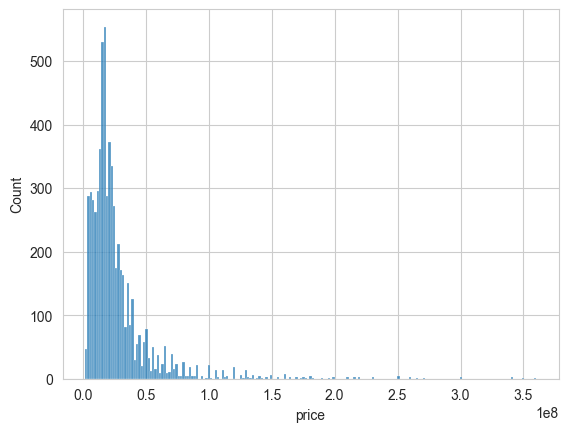

In [173]:
x = df['price']
sns.set_style('whitegrid')
sns.histplot(x)
plt.show()

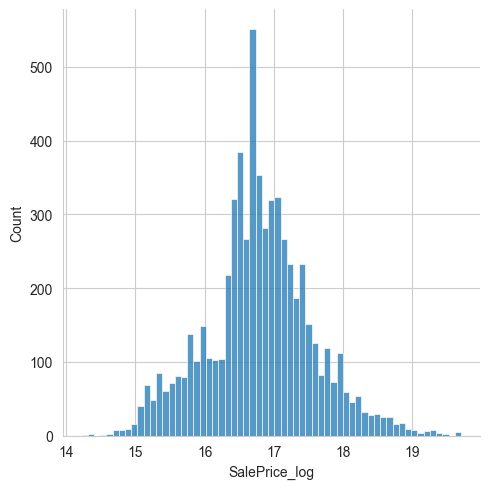

In [174]:
df['SalePrice_log'] = np.log(df['price'])
x = df['SalePrice_log']
sns.displot(x)
plt.show()

<Axes: >

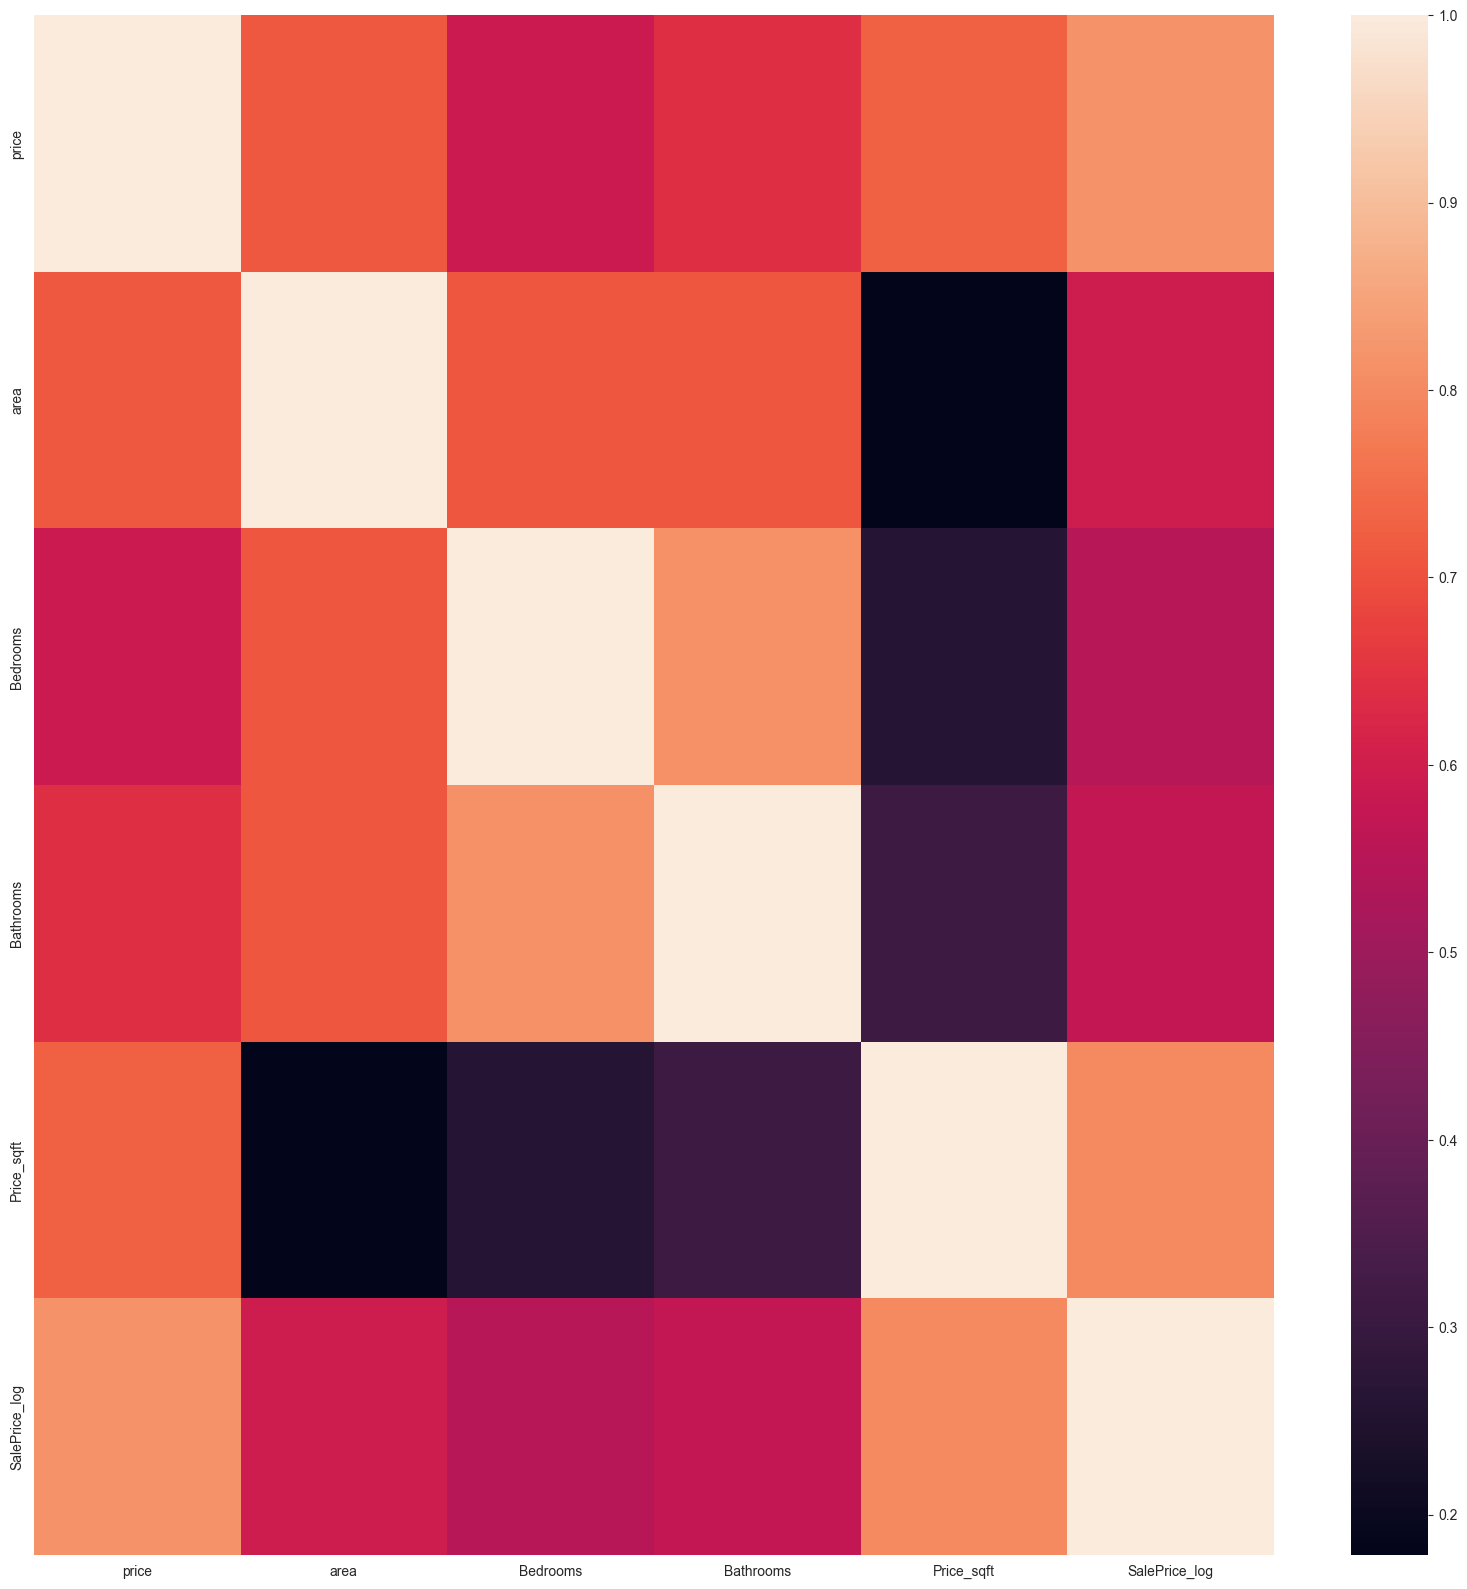

In [175]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [176]:
# df['Furnished_status'] = df['Furnished_status'].fillna("Unfurnished")

In [177]:
from sklearn.preprocessing import LabelEncoder

In [178]:
# neworold = LabelEncoder()
# furn_status = LabelEncoder()
# df['neworold'] = neworold.fit_transform(df['neworold'])
# df['Furnished_status'] = neworold.fit_transform(df['Furnished_status'])
# df

In [179]:
y = df['price']
x = df.drop(['price'],axis="columns")

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [189]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [190]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [191]:
model.predict(x_test)[:10]

array([22418131.08936697, 15830466.14680037, 38622089.47384009,
       24803802.75200415, 17859330.86080971, 60534105.30905487,
       33500728.06593779, 38475706.4731977 , 28978702.60469529,
       21532391.97432144])

In [192]:
model.score(x_test,y_test)

0.8854318512357436